***Neural network to recognize two handwritten digits, zero and one. This is a binary classification task***

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import logging
logging.getLogger('tesnsorflow').setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## DataSet

In [6]:
x = np.load('data/X.npy')
y = np.load('data/y.npy')

In [8]:
#1000 training examples
x = x[0:1000]
y = y[0:1000]

#### View the variables

In [9]:
print('First element of x is: ',x[0])

First element of x is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 

In [11]:
print('first element of y: ',y[0,0])
print('last element of y: ', y[-1,0])

first element of y:  0
last element of y:  1


####  Check the dimensions of your variables

In [12]:
print('shape of x: ',x.shape)
print('shape of y: ',y.shape)

shape of x:  (1000, 400)
shape of y:  (1000, 1)


## Visualizing the Data

In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together. 
The label for each image is displayed above the image 

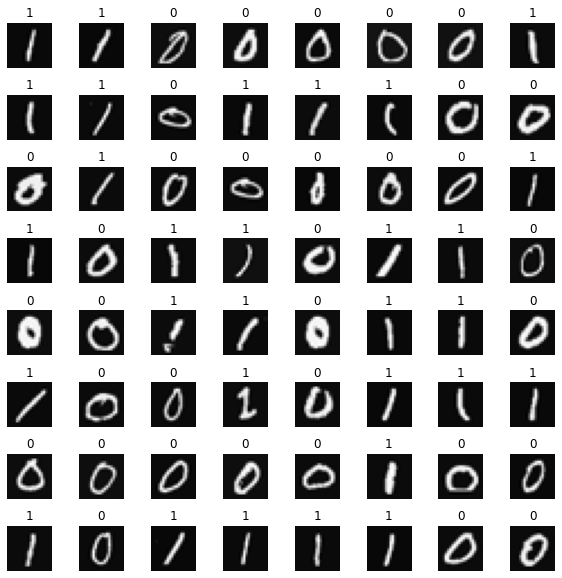

In [17]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

m,n = x.shape

fig,axes = plt.subplots(8,8, figsize = (8,8))
fig.tight_layout(pad = 0.1)

for i,ax in enumerate(axes.flat):
        #selecting random indecies
        random_index = np.random.randint(m)
        
        #select rows corresponding to random indecies
        x_random_reshaped = x[random_index].reshape((20,20)).T
        
        #displaying image
        ax.imshow(x_random_reshaped, cmap = 'gray')
        
        #displaying label above the image
        #using the value in y (results) corresponding to random index
        ax.set_title(y[random_index,0])
        ax.set_axis_off()

## Model Implementation using Tensorflow

The neural networkhas three dense layers with sigmoid activations.
    - Since the images are of size $20\times20$, this gives us $400$ inputs 

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $1$ output unit in layer 3. 

    - the dimensions of these parameters are determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 1) and the shape of `b3` is: (1,)

In [20]:
model = Sequential(
[
    #Sequential() is used to make the neural network of layers defined in it
    
    #as model will have 400 inputs and 1 output
    tf.keras.Input(shape = (400,)),
    #code for the layers of model
    
    #layer 1 with 25 neurons
    Dense(25,activation = 'sigmoid', name = 'layer1'),
    
    #layer 2 with 15 neurons
    Dense(15,activation = 'sigmoid', name = 'layer2'),
    
    #layer 3 with 1 neuron
    Dense(1,activation = 'sigmoid', name = 'layer3')
])

In [21]:
#to know about model designed above
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                10025     
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

In [22]:
        #input  * w of neurons * bias
L1_num_params = 400 * 25 + 25  
L2_num_params = 25 * 15 + 15   
L3_num_params = 15 * 1 + 1    
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


In [24]:
#to prove above weigths count we can check
#by getting weights
[layer1, layer2, layer3] = model.layers

In [25]:
#this will give us the weights of layer 1
w1,b1 = layer1.get_weights()
w2,b2 = layer2.get_weights()
w3,b3 = layer3.get_weights()


In [26]:
print(f"w1 shape {w1.shape} and b1 shape {b1.shape}")
print(f"w2 shape {w2.shape} and b2 shape {b2.shape}")
print(f"w3 shape {w3.shape} and b3 shape {b3.shape}")

w1 shape (400, 25) and b1 shape (25,)
w2 shape (25, 15) and b2 shape (15,)
w3 shape (15, 1) and b3 shape (1,)


The following code will define a loss function and run gradient descent to fit the weights of the model to the training data. 

In [30]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    x,y,
    epochs=20
)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
32/32 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 9.2001e-04
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 8.2416e-04
Epoch 9/20
32/32 [==============================]

*** Prediction ***

In [32]:
prediction = model.predict(x[0].reshape(1,400))
print(f"Prediction: ", prediction)

prediction = model.predict(x[500].reshape(1,400))
print("Prediction: ", prediction)

Prediction:  [[0.00027841]]
Prediction:  [[0.99972135]]


*** Explaiantion of Prediction***
As classification model reurns the probabilty if being positive class.
In this caase it will retrun probability of image being 1.

So first output gives very very low number that means its a zero on the other hand second output is 1

***Lets make it clear***

In [35]:
def check(predication):
    if prediction >= 0.5:
        #positive class (1)
        yhat = 1
    else:
        #negative class (0)
        yhat = 0
    return yhat

In [37]:
prediction = model.predict(x[0].reshape(1,400))
print(f"It is a: ", check(prediction))


It is a:  0


## Visualizing Prediction vs actual Label

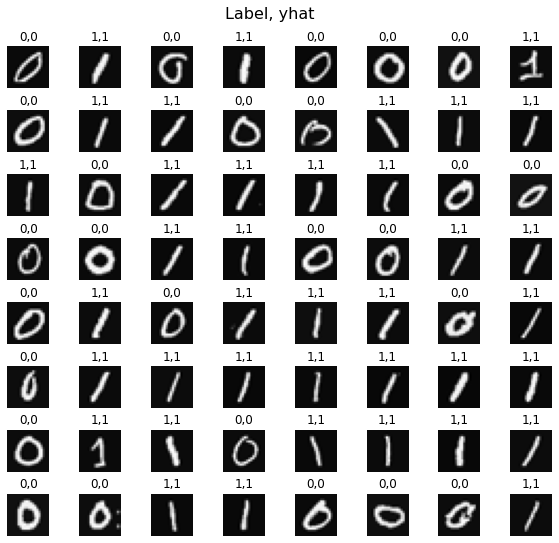

In [40]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = x.shape
fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(x[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()
